#Data preprocessing and pipelines

Here we introduce these new aspects:

* an example of preprocessing, namely scaling numerical variables;
* using a scikit-learn pipeline to chain preprocessing and model training.

## Data preparation

First, let’s load the full adult census dataset.

In [4]:
import pandas as pd

adult_census = pd.read_csv("adult.csv")

We now drop the target from the data we use to train our predictive model.

In [5]:
adult_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
target_name = "income"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

Then, we select only the numerical columns.

In [7]:
numerical_columns = ["age", "capital.gain", "capital.loss", "hours.per.week"]

data_numeric = data[numerical_columns]

Finally, we can divide our dataset into a train and test sets.

In [8]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42
)

##Model fitting with preprocessing

Let’s start by printing some statistics about the training data.

In [9]:
data_train.describe()

,age,capital.gain,capital.loss,hours.per.week
count,24420.000000,24420.000000,24420.000000,24420.000000
mean,38.534521,1100.636896,88.244554,40.546437
std,13.592626,7475.910059,405.319782,12.364975
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


We see that the dataset’s features span across different ranges. Some algorithms make some assumptions regarding the feature distributions and normalizing features is usually helpful to address such assumptions.

We show how to apply such normalization using a scikit-learn transformer called `StandardScaler`. This transformer shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.

First, one needs to call the method `fit` in order to learn the scaling from the data.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

We can inspect the computed means and standard deviations.

In [11]:
scaler.mean_

array([  38.53452088, 1100.63689599,   88.24455364,   40.54643735])

In [12]:
scaler.scale_

array([  13.59234787, 7475.75698813,  405.31148311,   12.36472145])

Once we have called the `fit` method, we can perform data transformation by calling the method `transform`.

In [13]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[-0.03932513, -0.14722748,  6.09594238,  3.99956949],
       [-0.99574562, -0.14722748, -0.21772034, -0.04419326],
       [ 1.79994504, -0.14722748, -0.21772034,  0.76455929],
       ...,
       [ 1.21137858, -0.14722748,  4.43795826, -0.04419326],
       [ 0.18138729, -0.14722748, -0.21772034,  0.76455929],
       [-1.21645804, -0.14722748, -0.21772034,  0.76455929]])

Finally, the method `fit_transform` is a shorthand method to call successively fit and then transform.

In [14]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[-0.03932513, -0.14722748,  6.09594238,  3.99956949],
       [-0.99574562, -0.14722748, -0.21772034, -0.04419326],
       [ 1.79994504, -0.14722748, -0.21772034,  0.76455929],
       ...,
       [ 1.21137858, -0.14722748,  4.43795826, -0.04419326],
       [ 0.18138729, -0.14722748, -0.21772034,  0.76455929],
       [-1.21645804, -0.14722748, -0.21772034,  0.76455929]])

By default, all scikit-learn transformers output NumPy arrays. Since scikit-learn 1.2, it is possible to set the output to be a pandas dataframe, which makes data exploration easier as it preserves the column names.

In [15]:
scaler = StandardScaler().set_output(transform="pandas")
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled.describe()

,age,capital.gain,capital.loss,hours.per.week
count,2.442000e+04,2.442000e+04,2.442000e+04,2.442000e+04
mean,-2.009131e-16,-1.869466e-17,6.634060e-17,2.182257e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.584312e+00,-1.472275e-01,-2.177203e-01,-3.198328e+00
25%,-7.750332e-01,-1.472275e-01,-2.177203e-01,-4.419326e-02
50%,-1.128959e-01,-1.472275e-01,-2.177203e-01,-4.419326e-02
75%,6.228121e-01,-1.472275e-01,-2.177203e-01,3.601830e-01
max,3.786357e+00,1.322921e+01,1.052957e+01,4.727447e+00


### Exercice 1

Visualize the effect of `StandardScaler` (befor and after)using  a scatterplot of `age` vs `hours-per-week`.

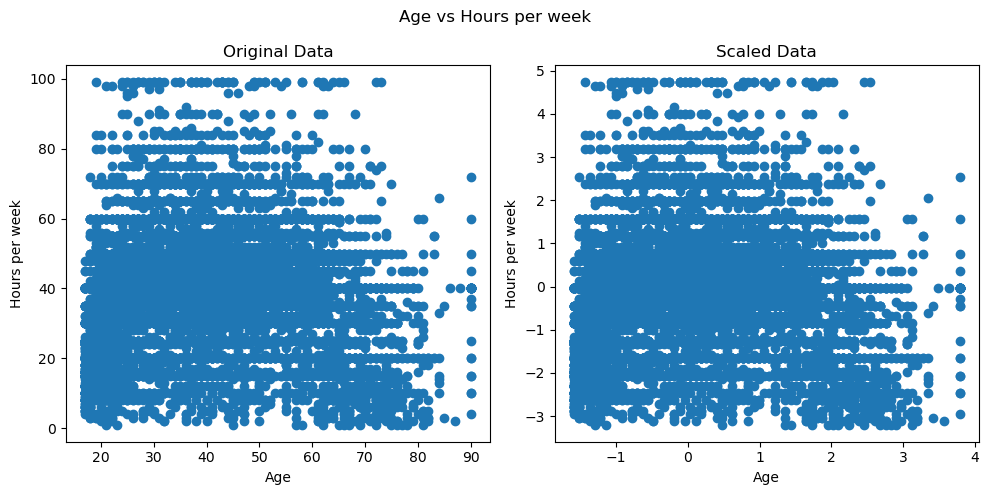

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(data_train["age"], data_train["hours.per.week"])
axs[1].scatter(data_train_scaled["age"], data_train_scaled["hours.per.week"])

axs[0].set_title("Original Data")
axs[1].set_title("Scaled Data")

axs[0].set_xlabel("Age")
axs[1].set_xlabel("Age")

axs[0].set_ylabel("Hours per week")
axs[1].set_ylabel("Hours per week")

plt.suptitle("Age vs Hours per week")

plt.tight_layout()

plt.show()

- We notice that in the original data, the age varies between around 18 and 90 years old, whereas in the scaled data, it ranges from -2 to 4.

- The Hours per week before to be scaled, spans the interval 0 to 100, whereas after scaling it goes from -3 to 5

- It doestn't affect the correlation between both variables

## Pipelines

We can easily combine sequential operations with a `scikit-learn` `Pipeline`, which chains together operations and is used as any other classifier or regressor. The helper function `make_pipeline` creates a `Pipeline`: it takes as arguments the successive transformations to perform, followed by the classifier or regressor model.

In [19]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

This predictive `pipeline` exposes the same methods as the final predictor: `fit` and `predict`.

In [20]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [21]:
elapsed_time

0.1009528636932373

To predict the targets given a test set, one uses the predict method.

In [22]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K'], dtype=object)

As a shorthand, we can check the score of the full predictive pipeline calling the method `model.score`.

In [23]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations"
)

The accuracy using a Pipeline is 0.798 with a fitting time of 0.101 seconds in 12 iterations


### Let's try out different scaling methods

In [35]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

model2 = make_pipeline(MinMaxScaler(), LogisticRegression())

model3 = make_pipeline(RobustScaler(), LogisticRegression())

In [36]:
start = time.time()
model2.fit(data_train, target_train)
elapsed_time2 = time.time() - start

start = time.time()
model3.fit(data_train, target_train)
elapsed_time3 = time.time() - start

In [37]:
predicted_target2 = model2.predict(data_test)
predicted_target3 = model3.predict(data_test)


In [39]:
model_name = model.__class__.__name__ + " with StandardScaler"
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations"
)

model_name = model2.__class__.__name__ + " with MinMaxScaler"
score = model2.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time2:.3f} seconds "
    f"in {model2[-1].n_iter_[0]} iterations"
)

model_name = model3.__class__.__name__ + " with RobustScaler"
score = model3.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time3:.3f} seconds "
    f"in {model3[-1].n_iter_[0]} iterations"
)

The accuracy using a Pipeline with StandardScaler is 0.798 with a fitting time of 0.101 seconds in 12 iterations
The accuracy using a Pipeline with MinMaxScaler is 0.794 with a fitting time of 0.105 seconds in 23 iterations
The accuracy using a Pipeline with RobustScaler is 0.798 with a fitting time of 0.174 seconds in 74 iterations


In [41]:
res = pd.DataFrame(
    {
    "scaling method": ["StandardScaler", "MinMaxScaler", "RobustScaler"],
    "fitting time": [elapsed_time, elapsed_time2, elapsed_time3],
    "accuracy": [model.score(data_test, target_test), model2.score(data_test, target_test), model3.score(data_test, target_test)]
})

In [42]:
res

,scaling method,fitting time,accuracy
0,StandardScaler,0.100953,0.797936
1,MinMaxScaler,0.104652,0.793514
2,RobustScaler,0.173611,0.797936


## Missing values analysis

In [25]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [27]:
missing_values_characters = ["?", " ", "", "NA", "N/A", "missing"]

In [28]:
data_missing = data.replace(missing_values_characters, float("nan"))

In [30]:
data_missing.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
dtype: int64

In [32]:
round(data_missing.isna().sum()/data.shape[0]*100, 2)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
dtype: float64

- We have some missing values in `workclass`, `occupation` and `native.country` variables.

## Duplicated values

In [34]:
data_missing.duplicated().sum()

25

- We have 25 duplicated rows in our dataset.

In [44]:
data_missing.loc[data_missing.duplicated(keep=False)].sort_values(by=data_missing.columns.tolist()).head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
19622,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States
10307,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
17456,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States
22934,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States
7615,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States
32065,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States
9269,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States


In [50]:
duplicated = data_missing.loc[data_missing.duplicated(keep=False)].index.tolist()

In [51]:
# removing duplicate rows 
data_unique = data_missing[data_missing.index.isin(duplicated)==False]
target_unique = target[data_missing.index.isin(duplicated)==False]

In [52]:
data_unique.shape, data_missing.shape

((32512, 14), (32561, 14))

In [54]:
-data_unique.shape[0]+ data_missing.shape[0]

49

In [55]:
data_train, data_test, target_train, target_test = train_test_split(
    data_unique[numerical_columns], target_unique, random_state=42
)

In [67]:
def compare_scalers(data_train, data_test, target_train, target_test):
    results = {}
    for scaler_name, scaler in {"standard_scaler": StandardScaler(), "min_max_scaler": MinMaxScaler(), "robust_scaler": RobustScaler()}.items():
        model = make_pipeline(scaler, LogisticRegression())
        start = time.time()
        model.fit(data_train, target_train)
        fitting_time = time.time() - start
        accuracy = model.score(data_test, target_test)
        results[scaler_name] = {
            "accuracy": accuracy,
            "fitting time": fitting_time,
            "iterations": model[-1].n_iter_[0]
            }
    return results

In [68]:
results = compare_scalers(data_train, data_test, target_train, target_test)

In [70]:
pd.DataFrame(results)

,standard_scaler,min_max_scaler,robust_scaler
accuracy,0.797367,0.791216,0.797367
fitting time,0.093277,0.088850,0.267756
iterations,12.000000,13.000000,70.000000
